#### Importing Libraries

In [104]:
import torch
import torch.nn as nn
import torchvision
from torchvision.models import vgg16 , VGG16_Weights
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt
import math

#### Checking for GPU availability

In [43]:
device = "cuda" if torch.cuda.is_available() else "cpu" 
print(f"device : {device}")

device : cuda


#### Importing the model 

In [69]:
model = vgg16(weights="VGG16_Weights.IMAGENET1K_FEATURES").features

In [70]:
model = model.to(device)
model.eval()

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (17): Conv2d(256, 512, kernel_si

In [71]:
preprocess = VGG16_Weights.IMAGENET1K_V1.transforms()

In [ ]:
def extract_layer_features(image_path , layer_idx):
    image = Image.open(image_path).convert("RGB")
    input_tensor = preprocess(image).unsqueeze(0).to(device)
    print(input_tensor.shape)
    
    activations = {}

    def hook_fn(module, input, output):
        activations["features"] = output.detach().cpu().squeeze(0).numpy()

    hook = model[layer_idx].register_forward_hook(hook_fn)

    with torch.no_grad():
        model(input_tensor)
    
    hook.remove()

    feature_map = activations.get("features")
    if feature_map is None:
        print(f"No activation found for layer {layer_idx}")
        return
    
    # feature_map = feature_map.squeeze(0)  # Remove batch dimension -> [Channels, H, W]
    num_channels = feature_map.shape[0]

    # Normalize feature maps for better visualization
    feature_map = (feature_map - feature_map.min()) / (feature_map.max() - feature_map.min())

    # Display feature maps
    fig, axes = plt.subplots(1, min(6, num_channels), figsize=(15, 10))
    for i in range(min(6, num_channels)):
        axes[i].imshow(feature_map[i], cmap="viridis")
        axes[i].axis("off")

    plt.show()

    print(f"Feature map extracted from layer {layer_idx} with shape: {feature_map.shape}")
    

torch.Size([1, 3, 224, 224])


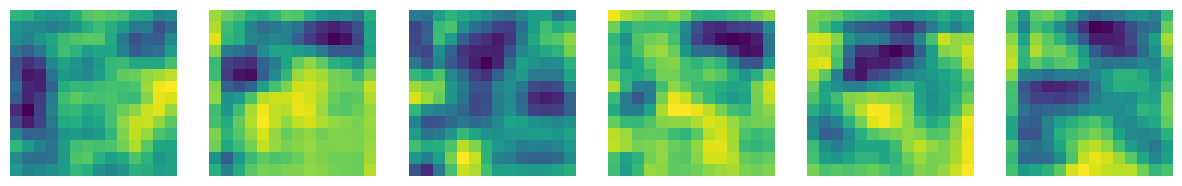

Feature map extracted from layer 28 with shape: (512, 14, 14)


In [121]:
extract_layer_features(r"Images\dog image.jpg" , 28)